In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
import pylab as plt
from astrometry.libkd.spherematch import *
from astrometry.util.fits import *
import numpy as np
from astrometry.util.starutil_numpy import *
from astrometry.util.plotutils import *
from glob import glob
from collections import Counter
import os

In [90]:
F1 = fits_table('14610_M33-B01-F01.gst.fits.gz')
F2 = fits_table('14610_M33-B01-F02.gst.fits.gz')
F3 = fits_table('14610_M33-B01-F03.gst.fits.gz')
F7 = fits_table('14610_M33-B01-F07.gst.fits.gz')
F8 = fits_table('14610_M33-B01-F08.gst.fits.gz')
F9 = fits_table('14610_M33-B01-F09.gst.fits.gz')
FF = [F1,F2,F3,F7,F8,F9]

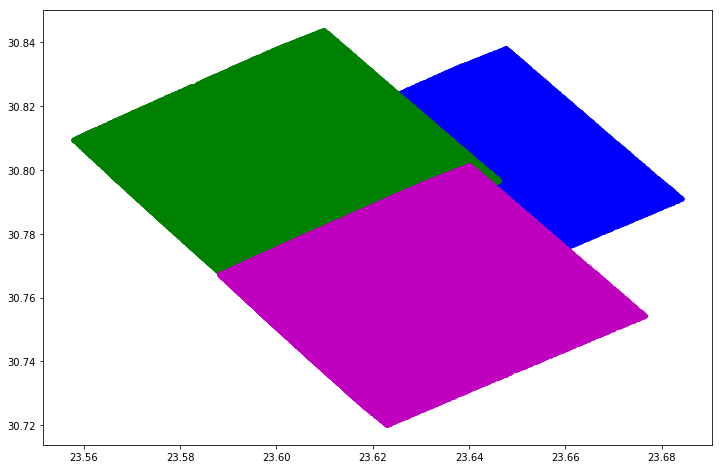

In [25]:
plt.plot(F1.ra, F1.dec, 'b.');
plt.plot(F2.ra, F2.dec, 'g.');
plt.plot(F7.ra, F7.dec, 'm.');

In [33]:
minra = min([F1.ra.min(), F2.ra.min(), F7.ra.min()])
maxra = max([F1.ra.max(), F2.ra.max(), F7.ra.max()])
mindec = min([F1.dec.min(), F2.dec.min(), F7.dec.min()])
maxdec = max([F1.dec.max(), F2.dec.max(), F7.dec.max()])

In [34]:
minra,maxra, mindec, maxdec

(23.55781368, 23.68415993, 30.72005979, 30.84397055)

In [38]:
F1.about()

tabledata object with 474009 rows and 26 columns:
   dec (<class 'numpy.ndarray'>) shape (474009,) dtype >f8
   f475w_chi (<class 'numpy.ndarray'>) shape (474009,) dtype >f4
   f475w_crowd (<class 'numpy.ndarray'>) shape (474009,) dtype >f4
   f475w_err (<class 'numpy.ndarray'>) shape (474009,) dtype >f4
   f475w_flag (<class 'numpy.ndarray'>) shape (474009,) dtype >i2
   f475w_rate (<class 'numpy.ndarray'>) shape (474009,) dtype >f4
   f475w_raterr (<class 'numpy.ndarray'>) shape (474009,) dtype >f4
   f475w_round (<class 'numpy.ndarray'>) shape (474009,) dtype >f4
   f475w_sharp (<class 'numpy.ndarray'>) shape (474009,) dtype >f4
   f475w_snr (<class 'numpy.ndarray'>) shape (474009,) dtype >f4
   f475w_std (<class 'numpy.ndarray'>) shape (474009,) dtype >f4
   f475w_vega (<class 'numpy.ndarray'>) shape (474009,) dtype >f4
   f814w_chi (<class 'numpy.ndarray'>) shape (474009,) dtype >f4
   f814w_crowd (<class 'numpy.ndarray'>) shape (474009,) dtype >f4
   f814w_err (<class 'numpy.ndar

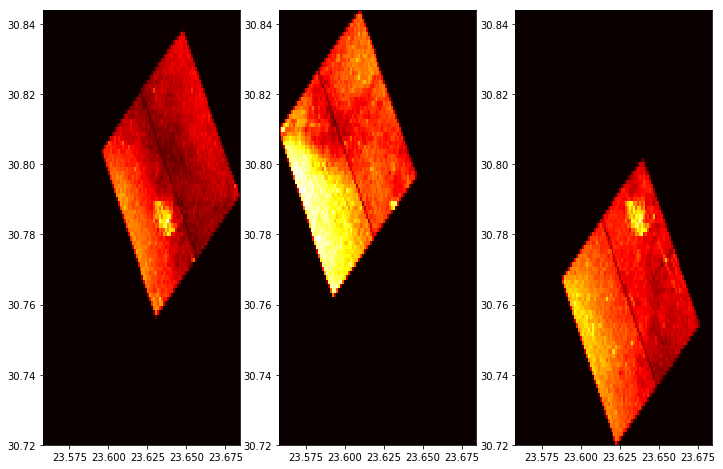

In [37]:
ha=dict(range=((minra,maxra),(mindec,maxdec)), doclf=False, docolorbar=False)
plt.subplot(1,3,1)
plothist(F1.ra, F1.dec, **ha);
plt.subplot(1,3,2)
plothist(F2.ra, F2.dec, **ha);
plt.subplot(1,3,3)
plothist(F7.ra, F7.dec, **ha);

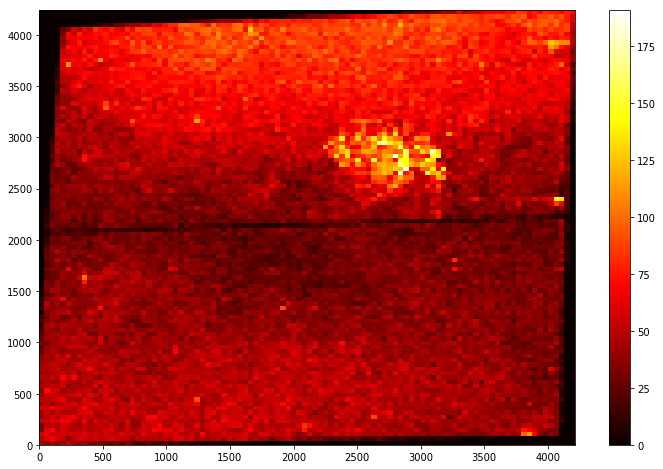

In [40]:
plothist(F1.x, F1.y);

In [13]:
I,J,d = match_radec(F1.ra, F1.dec, F2.ra, F2.dec, 0.1/3600.)

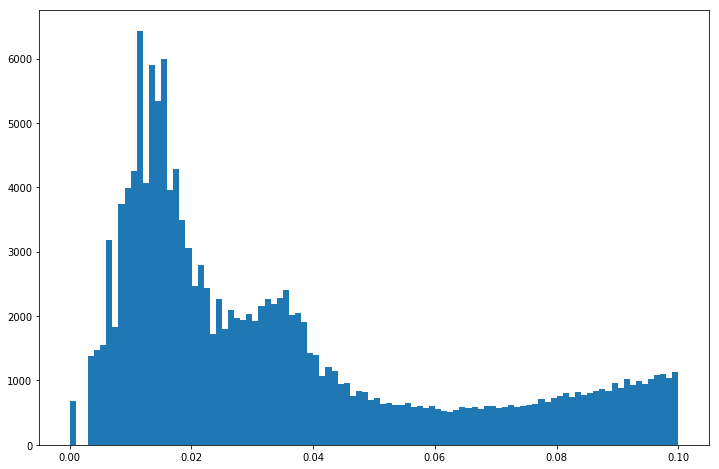

In [14]:
plt.hist(d*3600, bins=100);

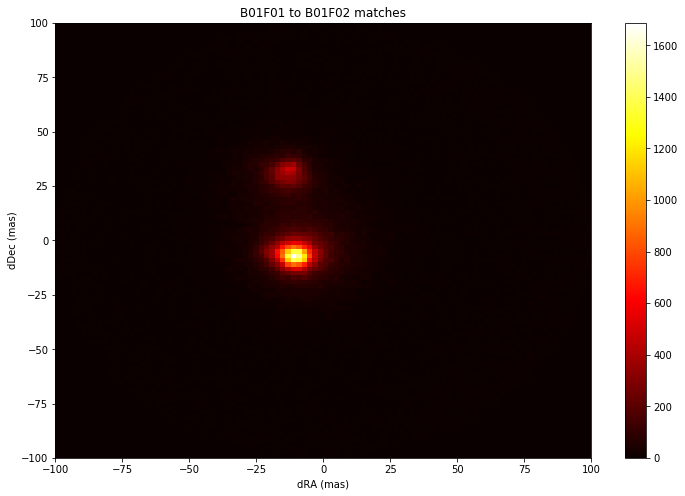

In [21]:
cosdec = np.cos(np.deg2rad(np.median(F1.dec)))
dra = (F1.ra[I]-F2.ra[J])*cosdec * 3600.*1000.
ddec = (F1.dec[I]-F2.dec[J]) * 3600.*1000.
plothist(dra, ddec)
plt.xlabel('dRA (mas)')
plt.ylabel('dDec (mas)')
plt.title('B01F01 to B01F02 matches')
plt.savefig('f1f2.png');

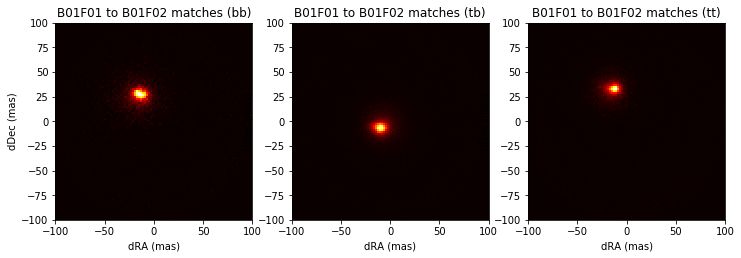

In [49]:
Ibb = np.flatnonzero((F1.y[I] < 2000) * (F2.y[J] < 2000))
Itb = np.flatnonzero((F1.y[I] > 2200) * (F2.y[J] < 2000))
Itt = np.flatnonzero((F1.y[I] > 2200) * (F2.y[J] > 2200))

ha = dict(doclf=False, docolorbar=False, range=((-100,100),(-100,100)))
plt.subplot(1,3,1)
plothist(dra[Ibb], ddec[Ibb], **ha)
plt.axis('square')
plt.xlabel('dRA (mas)')
plt.ylabel('dDec (mas)')
plt.title('B01F01 to B01F02 matches (bb)')

plt.subplot(1,3,2)
plothist(dra[Itb], ddec[Itb], **ha)
plt.axis('square')
plt.xlabel('dRA (mas)')
plt.ylabel('dDec (mas)')
plt.title('B01F01 to B01F02 matches (tb)')

plt.subplot(1,3,3)
plothist(dra[Itt], ddec[Itt], **ha)
plt.axis('square')
plt.xlabel('dRA (mas)')
plt.ylabel('dDec (mas)')
plt.title('B01F01 to B01F02 matches (tt)')

plt.savefig('f1f2b.png');

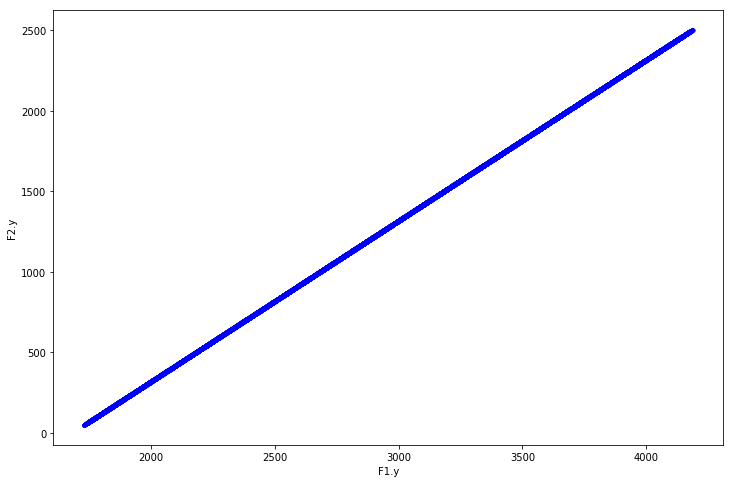

In [51]:
plt.plot(F1.y[I], F2.y[J], 'b.')
plt.xlabel('F1.y')
plt.ylabel('F2.y');

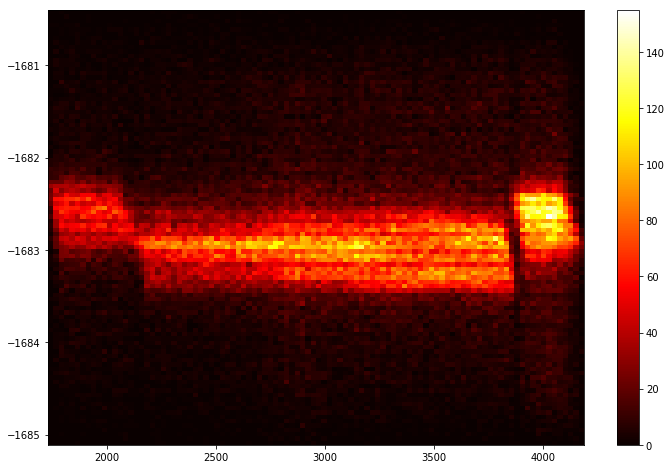

In [55]:
plothist(F1.y[I], F2.y[J]-F1.y[I]);

In [61]:
u1 = np.ones(len(F1), bool)
u1[I] = False
u2 = np.ones(len(F2), bool)
u2[J] = False

In [57]:
len(F1), len(I), np.sum(u1)

(474009, 153165, 339747.0)

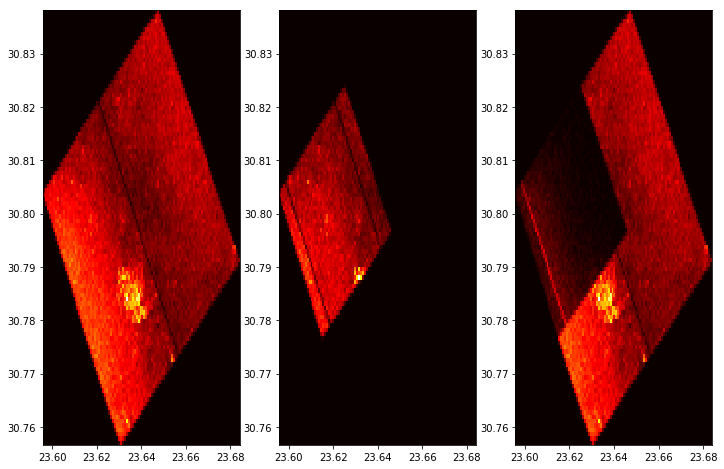

In [62]:
ha = dict(doclf=False, docolorbar=False, range=((F1.ra.min(), F1.ra.max()), (F1.dec.min(), F1.dec.max())))
plt.subplot(1,3,1)
plothist(F1.ra, F1.dec, **ha)
plt.subplot(1,3,2)
plothist(F1.ra[I], F1.dec[I], **ha)
plt.subplot(1,3,3)
plothist(F1.ra[u1], F1.dec[u1], **ha);

In [11]:
I,J,d = match_radec(F1.ra, F1.dec, F7.ra, F7.dec, 1.0/3600.)

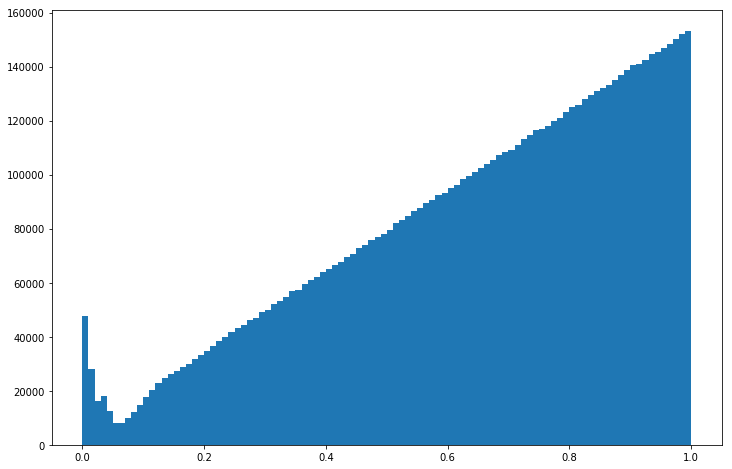

In [12]:
plt.hist(d*3600, bins=100);

Matched 121400 of 474009 old and 588182 new
F RA 23.55781368 23.64624576 Dec 30.76234717 30.84397055
matched RA 23.59570082 23.68415993 Dec 30.7566409 30.83821019


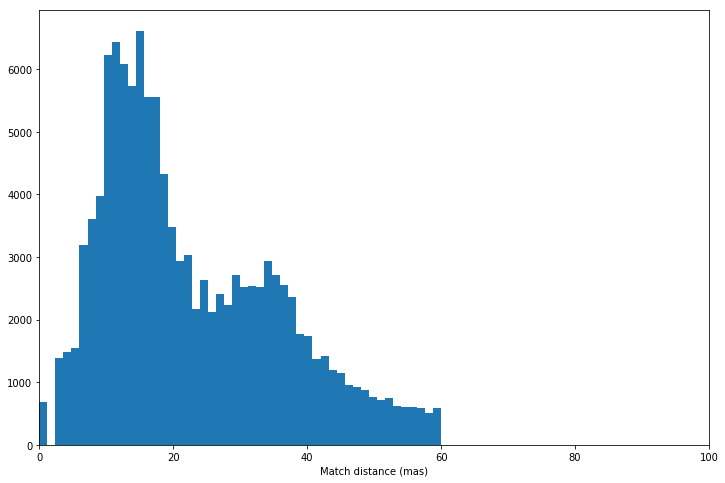

saved merge-00.png
matched RA 23.55781368 23.68415993 Dec 30.7566409 30.84397055
Matched 155674 of 942638 old and 668991 new
F RA 23.52005469 23.60854001 Dec 30.76810662 30.84972364
matched RA 23.55781368 23.68415993 Dec 30.7566409 30.84397055


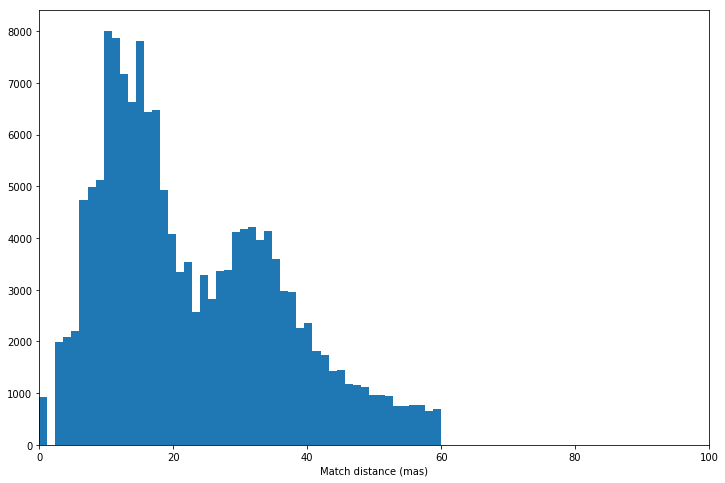

saved merge-01.png
matched RA 23.52005469 23.68415993 Dec 30.7566409 30.84972364
Matched 164436 of 1458732 old and 593625 new
F RA 23.58809277 23.67659441 Dec 30.72005979 30.80157356
matched RA 23.52005469 23.68415993 Dec 30.7566409 30.84972364


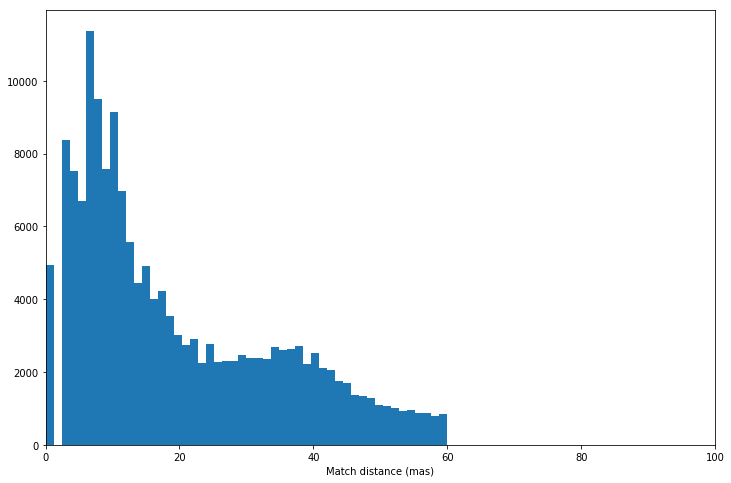

saved merge-02.png
matched RA 23.52005469 23.68415993 Dec 30.72005979 30.84972364
Matched 382058 of 1890827 old and 752616 new
F RA 23.55027864 23.63870768 Dec 30.72575022 30.80734936
matched RA 23.52005469 23.68415993 Dec 30.72005979 30.84972364


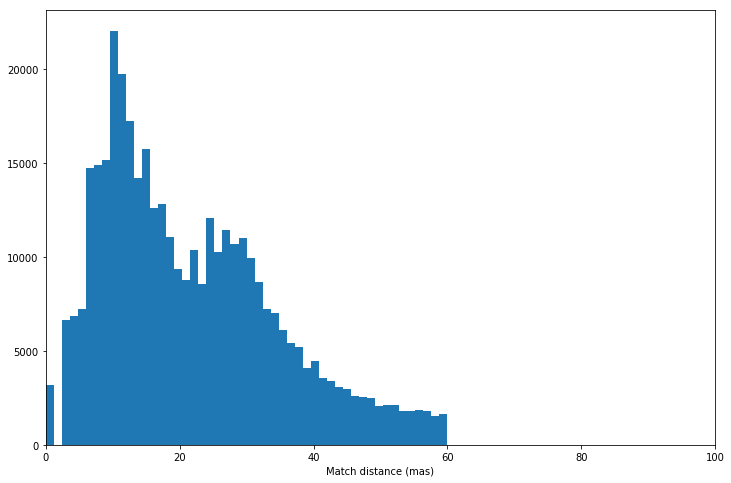

saved merge-03.png
matched RA 23.52005469 23.68415993 Dec 30.72005979 30.84972364
Matched 401146 of 2270613 old and 844541 new
F RA 23.51246222 23.60090707 Dec 30.73152809 30.81307643
matched RA 23.52005469 23.68415993 Dec 30.72005979 30.84972364


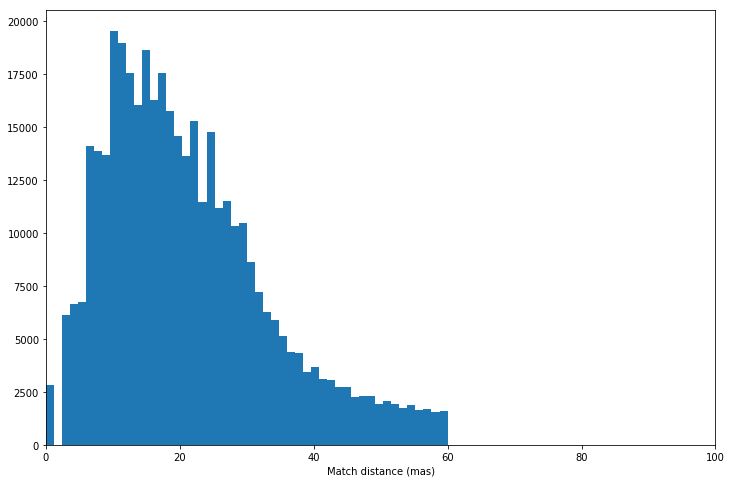

saved merge-04.png
matched RA 23.51246222 23.68415993 Dec 30.72005979 30.84972364


<Figure size 864x576 with 0 Axes>

In [93]:
def addnew(F):
    F.nmatched = np.ones(len(F), np.uint8)
    F.avgra = F.ra.copy()
    F.avgdec = F.dec.copy()

F = FF[0].copy()
addnew(F)
merged = F

ps = PlotSequence('merge')

avgcols = ['avgra', 'avgdec',
    'f475w_rate', 'f475w_raterr', 'f475w_vega', 'f475w_std', 'f475w_err',
    'f475w_chi', 'f475w_snr', 'f475w_sharp', 'f475w_round', 'f475w_crowd',
    'f814w_rate', 'f814w_raterr', 'f814w_vega', 'f814w_std', 'f814w_err',
    'f814w_chi', 'f814w_snr', 'f814w_sharp', 'f814w_round', 'f814w_crowd',]

for F in FF[1:]:
    addnew(F)
    I,J,d = match_radec(merged.ra, merged.dec, F.ra, F.dec, 0.06/3600., nearest=True)
    print('Matched', len(I), 'of', len(merged), 'old and', len(F), 'new')

    print('F RA', F.ra.min(), F.ra.max(), 'Dec', F.dec.min(), F.dec.max())
    print('matched RA', merged.ra.min(), merged.ra.max(), 'Dec', merged.dec.min(), merged.dec.max())
    
    plt.clf()
    plt.hist(d*3600.*1000., bins=50)
    plt.xlabel('Match distance (mas)')
    plt.xlim(0, 100)
    plt.show()
    ps.savefig()

    # unmatched
    #Um = np.ones(len(merged), bool)
    #Um[I] = False
    Uf = np.ones(len(F), bool)
    Uf[J] = False
    U = F[Uf]

    # matched --
    for col in avgcols:
        m = merged.get(col)
        f = F.get(col)
        m[I] += f[J]
    merged.nmatched[I] += 1
    
    merged = merge_tables([merged, U])
    print('matched RA', merged.ra.min(), merged.ra.max(), 'Dec', merged.dec.min(), merged.dec.max())

for col in avgcols:
    m = merged.get(col)
    m /= merged.nmatched.astype(float)

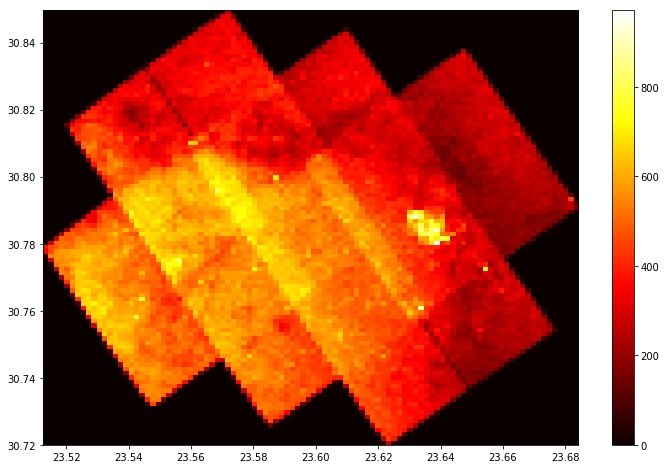

In [97]:
plothist(merged.ra, merged.dec);
plt.savefig('merged.png')

In [96]:
len(merged)
merged.writeto('merged.fits')

In [82]:
merged.dec.min(), merged.dec.max()

(30.72005979, 61.6479145)